In [ ]:
# Import library yang diperlukan

# Import library yang diperlukan

# 1. Pandas untuk manipulasi dan analisis data, terutama dengan struktur DataFrame.
import pandas as pd

# 2. NumPy untuk operasi matematis dan komputasi array n-dimensi.
import numpy as np

# 3. LabelBinarizer dari sklearn.preprocessing untuk mengonversi label kategori
#    menjadi format biner (one-hot encoding).
from sklearn.preprocessing import LabelBinarizer

# 4. KNeighborsClassifier dari sklearn.neighbors adalah algoritma K-Nearest Neighbors (KNN)
#    untuk klasifikasi berbasis jarak.
from sklearn.neighbors import KNeighborsClassifier

# 5. Fungsi-fungsi evaluasi dari sklearn.metrics:
#    - accuracy_score: untuk menghitung akurasi prediksi.
#    - precision_score: untuk menghitung presisi model.
#    - recall_score: untuk menghitung sensitivitas (recall).
#    - f1_score: untuk menghitung rata-rata harmonik antara presisi dan recall.
#    - classification_report: untuk menampilkan ringkasan metrik evaluasi.
#    - matthews_corrcoef: untuk menghitung koefisien korelasi Matthews.
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, matthews_corrcoef
)

# 6. Fungsi `euclidean` dari scipy.spatial.distance untuk menghitung jarak Euclidean
#    antara dua titik dalam ruang n-dimensi.
from scipy.spatial.distance import euclidean

# 7. Matplotlib untuk membuat visualisasi data (plotting).
import matplotlib.pyplot as plt

# 8. Seaborn untuk membuat visualisasi data statistik yang lebih menarik.
import seaborn as sns

url = '/content/gender_classification_v7.csv'

# Membaca dataset
df  = pd.read_csv(url)

df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [ ]:
# Menampilkan data NULL, NA, dan NAN
print("Data dengan nilai NULL, NA, atau NAN:")
print(df[df.isnull().any(axis=1)])

# Menampilkan data duplikasi
print("\nData duplikasi:")
print(df[df.duplicated()])

# Menghapus data NULL, NA, dan NAN
df = df.dropna()

# Menghapus data duplikasi
df = df.drop_duplicates()

# Menampilkan DataFrame setelah dibersihkan
print("\nDataFrame setelah dibersihkan:")
print(df)

Data dengan nilai NULL, NA, atau NAN:
Empty DataFrame
Columns: [long_hair, forehead_width_cm, forehead_height_cm, nose_wide, nose_long, lips_thin, distance_nose_to_lip_long, gender]
Index: []

Data duplikasi:
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
59            1               14.1                 5.9          0          0   
66            1               14.2                 6.2          0          0   
175           1               12.7                 5.7          1          1   
230           1               12.9                 5.1          0          0   
261           1               13.0                 6.2          1          1   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0      

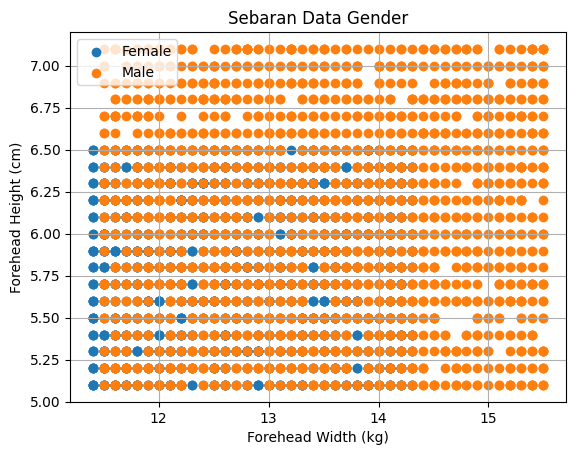

In [ ]:
# Visualisasi Data

# Membuat figure dan axes untuk plot menggunakan Matplotlib
fig, ax = plt.subplots()

# Melakukan iterasi berdasarkan grup pada DataFrame df yang dikelompokkan berdasarkan kolom 'klasifikasi'
for klasifikasi, d in df.groupby('gender'):

    # Membuat scatter plot untuk setiap grup
    # x = data 'tekanandarah', y = data 'albumin'
    # 'label=klasifikasi' memberikan label untuk setiap grup (diambil dari nilai kolom 'Outcome')
    ax.scatter(d['forehead_width_cm'], d['forehead_height_cm'], label=klasifikasi)

# Menambahkan legenda untuk membedakan grup berdasarkan 'Outcome'
plt.legend(loc='upper left')
# Menambahkan judul pada plot
plt.title('Sebaran Data Gender')
# Menambahkan label pada sumbu x (tekanandarah)
plt.xlabel('Forehead Width (kg)')
# Menambahkan label pada sumbu y (Albumin)
plt.ylabel('Forehead Height (cm)')
# Menambahkan grid untuk mempermudah pembacaan plot
plt.grid(True)
# Menampilkan plot ke layar
plt.show()

In [ ]:
# Mengonversi kolom 'tekanandarah' dan 'albumin' dari DataFrame df menjadi array NumPy 2D
# Data ini digunakan sebagai fitur (input) untuk model machine learning
x_train = np.array(df[['forehead_width_cm', 'forehead_height_cm']])

# Mengonversi kolom 'klasifikasi' dari DataFrame df menjadi array NumPy 1D
# Data ini digunakan sebagai label (output) untuk model machine learning
y_train = np.array(df['gender'])

# Mencetak isi x_train (fitur/input) dengan format array NumPy
print(f'x_train:\n{x_train}\n')
# Mencetak isi y_train (label/output) dengan format array NumPy
print(f'y_train: {y_train}')

x_train:
[[11.8  6.1]
 [14.   5.4]
 [11.8  6.3]
 ...
 [14.1  7. ]
 [11.6  5.9]
 [12.3  6.9]]

y_train: ['Male' 'Female' 'Male' ... 'Male' 'Female' 'Male']


In [ ]:
# Membuat objek LabelBinarizer, yang digunakan untuk mengonversi label kategori menjadi format biner
lb = LabelBinarizer()

# Menggunakan LabelBinarizer untuk mengonversi y_train (label asli) menjadi format biner
# fit_transform() secara otomatis melakukan dua hal:
# 1. Menyesuaikan LabelBinarizer dengan data (fit)
# 2. Mengonversi data sesuai dengan skema biner (transform)
y_train = lb.fit_transform(y_train)

# Mencetak hasil y_train setelah dikonversi ke format biner
print(f'y_train: \n, {y_train}')

y_train: 
, [[1]
 [0]
 [1]
 ...
 [1]
 [0]
 [1]]


In [ ]:
# Mengubah array 2D y_train menjadi array 1D menggunakan fungsi flatten()
# Setelah LabelBinarizer, y_train berbentuk array 2D dengan setiap label dalam format biner,
# seperti [[0], [1], [1], ...]. flatten() mengubahnya menjadi [0, 1, 1, ...].
y_train = y_train.flatten()

# Mencetak hasil y_train setelah diubah menjadi array 1D
print(f'y_train: {y_train}')

y_train: [1 0 1 ... 1 0 1]


In [ ]:
# Menentukan jumlah nearest neighbors/tetangga terdekat (K) yang digunakan dalam algoritma K-Nearest Neighbors (KNN)
K = 3

# Membuat objek model KNeighborsClassifier dengan parameter n_neighbors=K
# n_neighbors menentukan jumlah tetangga yang akan dipertimbangkan dalam proses klasifikasi
model = KNeighborsClassifier(n_neighbors=K)

# Melatih model KNN menggunakan data latih (x_train) dan label latih (y_train)
# model.fit() akan menemukan pola dalam data latih untuk kemudian digunakan dalam prediksi
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:

A_forehead_width_cm = 155
A_forehead_height_cm = 70

# Membuat array NumPy dengan data baru [A_Age, A_Glucose] dan mengubahnya menjadi array 2D dengan reshape
# reshape(1, -1) mengubah array 1D menjadi array 2D dengan 1 baris dan sejumlah kolom sesuai panjang array
x_new = np.array([[A_forehead_width_cm, A_forehead_height_cm]]).reshape(1, -1)

# Menampilkan x_new untuk memverifikasi format data baru (array 2D dengan 1 baris)
x_new

array([[155,  70]])

In [ ]:
# Menggunakan model yang telah dilatih (model) untuk memprediksi label dari data baru (x_new)
# model.predict(x_new) akan mengembalikan hasil prediksi berdasarkan input data baru
y_new = model.predict(x_new)

# Menampilkan hasil prediksi y_new yang berisi label (outcome) untuk data baru
y_new

array([1])

In [ ]:
# Menggunakan inverse_transform() dari LabelBinarizer untuk mengonversi hasil prediksi (y_new)
# dari format biner kembali ke label asli.
# Ini diperlukan karena LabelBinarizer mengubah label menjadi format biner selama pelatihan,
# dan kita ingin mengembalikannya ke format aslinya (misalnya, yes atau no).
lb.inverse_transform(y_new)

array(['Male'], dtype='<U6')

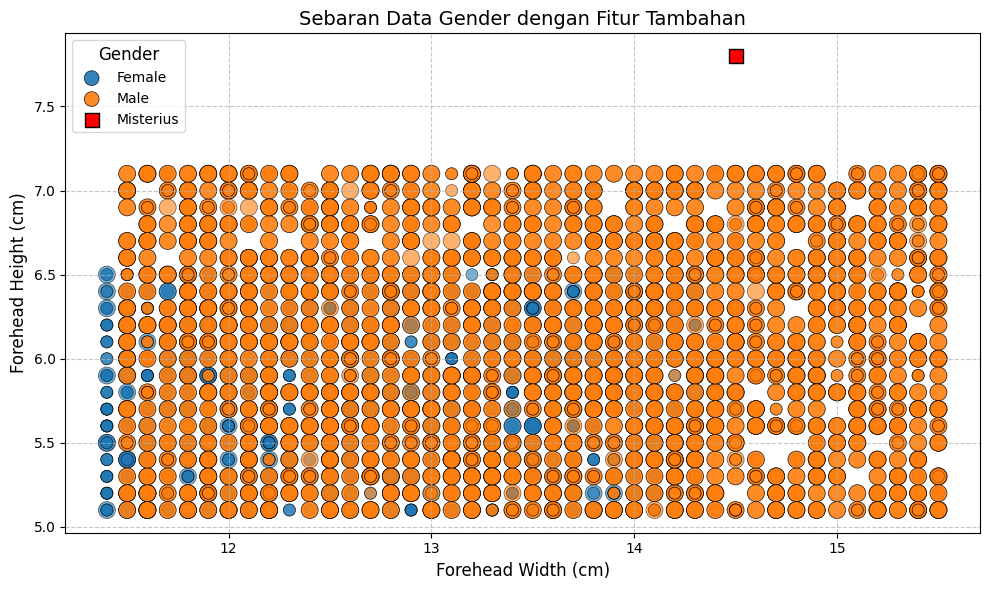

In [ ]:
import matplotlib.pyplot as plt

# Data misterius
forehead_width_cm = 14.5
forehead_height_cm = 7.8
nose_wide = 1  # Misalnya nilai untuk 'nose_wide'
lips_thin = 0  # Misalnya nilai untuk 'lips_thin'
nose_long = 1  # Misalnya nilai untuk 'nose_long'
distance_nose_to_lip_long = 3.5  # Misalnya nilai 3.5 cm untuk 'distance_nose_to_lip_long'
long_hair = 0  # Misalnya nilai 0 untuk 'long_hair'

fig, ax = plt.subplots(figsize=(10, 6))

# Menentukan ukuran dan transparansi berdasarkan fitur tambahan
sizes = df['nose_wide'].map({1: 150, 0: 75})  # Ukuran berdasarkan 'nose_wide'
alpha = df['lips_thin'].map({1: 0.9, 0: 0.6})  # Transparansi berdasarkan 'lips_thin'

# Plot data berdasarkan kategori gender
for gender, group in df.groupby('gender'):
    ax.scatter(
        group['forehead_width_cm'],
        group['forehead_height_cm'],
        label=gender,
        s=sizes[group.index],  # Ukuran berdasarkan 'nose_wide'
        alpha=alpha[group.index],  # Transparansi berdasarkan 'lips_thin'
        edgecolor='black',  # Garis tepi hitam untuk membedakan titik
        linewidth=0.5  # Ketebalan garis tepi
    )

# Menambahkan titik misterius
plt.scatter(
    forehead_width_cm,
    forehead_height_cm,
    marker='s',  # Menggunakan bentuk persegi
    color='red',  # Warna merah untuk titik misterius
    label='Misterius',  # Label untuk titik misterius
    edgecolor='black',  # Garis tepi hitam untuk membedakan titik
    s=100  # Ukuran titik misterius
)

# Menambahkan elemen-elemen pada plot
plt.legend(loc='upper left', title='Gender', fontsize=10, title_fontsize=12)  # Menyesuaikan ukuran legend
plt.title('Sebaran Data Gender dengan Fitur Tambahan', fontsize=14)  # Judul grafik
plt.xlabel('Forehead Width (cm)', fontsize=12)  # Label sumbu X
plt.ylabel('Forehead Height (cm)', fontsize=12)  # Label sumbu Y
plt.grid(True, linestyle='--', alpha=0.7)  # Menambahkan grid dengan garis putus-putus dan transparansi
plt.tight_layout()
plt.show()  # Menampilkan grafik

In [ ]:
import numpy as np

# Menentukan nilai untuk fitur-fitur dari 'misterius'
forehead_width_cm = 14.5
forehead_height_cm = 7.8
nose_wide = 1  # Misalnya nilai 1 untuk 'nose_wide'
lips_thin = 0  # Misalnya nilai 0 untuk 'lips_thin'
nose_long = 1  # Misalnya nilai 1 untuk 'nose_long'
distance_nose_to_lip_long = 3.5  # Misalnya nilai 3.5 cm untuk 'distance_nose_to_lip_long'
long_hair = 0  # Misalnya nilai 0 untuk 'long_hair'

# Membuat array 'misterius' dengan semua fitur
misterius = np.array([
    forehead_width_cm,
    forehead_height_cm,
    nose_wide,
    lips_thin,
    nose_long,
    distance_nose_to_lip_long,
    long_hair
])

print(f'Misterius array: {misterius}')

Misterius array: [14.5  7.8  1.   0.   1.   3.5  0. ]


In [ ]:
# Membuat array X_train dari beberapa fitur yang ada dalam dataset (sesuaikan dengan nama kolom di CSV Anda)
X_train = np.array(df[['forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'lips_thin',
                       'nose_long', 'distance_nose_to_lip_long', 'long_hair']])

# Menampilkan X_train
print(f'X_train:\n{X_train}')

X_train:
[[11.8  6.1  1.  ...  0.   1.   1. ]
 [14.   5.4  0.  ...  0.   0.   0. ]
 [11.8  6.3  1.  ...  1.   1.   0. ]
 ...
 [14.1  7.   1.  ...  1.   1.   1. ]
 [11.6  5.9  0.  ...  0.   1.   1. ]
 [12.3  6.9  0.  ...  1.   1.   1. ]]


In [ ]:
from scipy.spatial.distance import euclidean

# Menghitung jarak Euclidean antara 'misterius' dan setiap titik data di X_train
data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak  # Menampilkan daftar jarak Euclidean

[4.4079473681068375,
 4.610856753359401,
 4.097560249709575,
 3.3391615714128,
 4.456455991031438,
 3.391164991562634,
 4.177319714841085,
 4.822862220714997,
 4.665833258915281,
 5.173973328110612,
 4.124318125460256,
 3.640054944640259,
 3.748332962798262,
 3.2341923257592455,
 4.126742056392669,
 4.243819034784589,
 3.461213659975356,
 4.371498598878879,
 5.3637673327615545,
 3.7549966711037177,
 3.2419130154894655,
 3.4322004603461025,
 3.5735136770411273,
 3.8444765573482176,
 4.537620521815371,
 4.726520919238589,
 4.230839160261236,
 5.1,
 4.433959855479072,
 3.3376638536557275,
 3.9560080889704965,
 3.7536648758246915,
 5.27162214123888,
 4.977951385861457,
 4.272001872658765,
 3.361547262794322,
 4.588027898781784,
 4.6679760067935225,
 4.69148164229596,
 3.24037034920393,
 4.361192497471305,
 3.043024810940588,
 4.053393639902249,
 5.1778373863998475,
 3.4727510708370675,
 4.557411546042337,
 4.798958220280731,
 4.705316142407437,
 5.1478150704935,
 5.078385570237849,
 4.4911

In [ ]:
df['jarak'] = data_jarak  # Menambahkan kolom baru 'jarak' ke DataFrame df yang berisi jarak Euclidean
df_sorted = df.sort_values('jarak')  # Mengurutkan DataFrame berdasarkan kolom 'jarak'

In [ ]:
X_test = np.array([
    [14.5, 7.8, 1, 0, 1, 3.5, 0],
    [15.0, 8.1, 0, 1, 0, 2.8, 1],
    [14.2, 7.5, 1, 1, 1, 3.0, 1],
    [14.8, 7.9, 0, 0, 0, 3.2, 0]
])  # Data uji dengan beberapa fitur


from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_test = lb.fit_transform(np.array(['male', 'male', 'female', 'female']))  # Transformasi label gender ke dalam bentuk numerik

# Menampilkan data uji
print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}\n')

X_test:
[[14.5  7.8  1.   0.   1.   3.5  0. ]
 [15.   8.1  0.   1.   0.   2.8  1. ]
 [14.2  7.5  1.   1.   1.   3.   1. ]
 [14.8  7.9  0.   0.   0.   3.2  0. ]]

y_test:
[1 1 0 0]



In [ ]:
print(X_train.shape[1])  # Jumlah fitur pada data latih
print(X_test.shape[1])   # Jumlah fitur pada data uji


7
7


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Saat melatih
X_test_scaled = scaler.transform(X_test)        # Gunakan scaler yang sama untuk data uji


In [ ]:
from sklearn.metrics import f1_score

# Contoh data
y_test = [0, 1, 1, 0, 1]  # Label sebenarnya
y_  pred = [0, 1, 0, 0, 1]# Hasil prediksi model

# Menghitung F1-score
f1 = f1_score(y_test, y_pred)  # Menghitung F1-score dari hasil prediksi model
print(f'F1-score: {f1}')  # Menampilkan nilai F1-score


F1-score: 0.8


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)  # Menghitung F1-score dari hasil prediksi model
print(f'f1-score: {f1}')  # Menampilkan nilai F1-score

f1-score: 0.8


In [ ]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)  # Menghitung recall dari hasil prediksi model
print(f'Recall: {rec}')  # Menampilkan nilai recall

Recall: 0.6666666666666666


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)  # Menghitung F1-score dari hasil prediksi model
print(f'f1-score: {f1}')  # Menampilkan nilai F1-score

f1-score: 0.8


In [ ]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)  # Menghasilkan laporan klasifikasi dengan metrik precision, recall, f1-score
print(f'Classification Report:\n{cls_report}')  # Menampilkan laporan klasifikasi

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)  # Menghitung Matthews Correlation Coefficient (MCC) dari hasil prediksi model
print(f'MCC: {mcc}')  # Menampilkan nilai MCC

MCC: 0.6666666666666666
